In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
driver_locations = "/content/gdrive/MyDrive/week_8_data/driver_locations_during_request.csv"
data = "/content/gdrive/MyDrive/week_8_data/data_cleaning.csv"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
import pandas as pd
df= pd.read_csv(data)

In [6]:
df.head()

,Unnamed: 0,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,order_id,driver_id,driver_action,lat,lng,start_hour,end_hour,trip_distance_km,trip_time,rainy,weekend
0,10,1259098,"6.444648,3.489271","6.586237700000001,3.2173232",2021-11-13 13:47:32,2021-11-13 16:02:43,392005,245597,accepted,6.549147,3.392184,13.0,16,33.919188,0 days 02:15:11,False,True
1,11,1259098,"6.444648,3.489271","6.586237700000001,3.2173232",2021-11-13 13:47:32,2021-11-13 16:02:43,392005,243172,rejected,6.570408,3.396597,13.0,16,33.919188,0 days 02:15:11,False,True
2,12,1259098,"6.444648,3.489271","6.586237700000001,3.2173232",2021-11-13 13:47:32,2021-11-13 16:02:43,392005,243392,rejected,6.566144,3.366483,13.0,16,33.919188,0 days 02:15:11,False,True
3,13,1259098,"6.444648,3.489271","6.586237700000001,3.2173232",2021-11-13 13:47:32,2021-11-13 16:02:43,392005,243281,rejected,6.576791,3.389592,13.0,16,33.919188,0 days 02:15:11,False,True
4,14,1259098,"6.444648,3.489271","6.586237700000001,3.2173232",2021-11-13 13:47:32,2021-11-13 16:02:43,392005,244078,rejected,6.577215,3.371172,13.0,16,33.919188,0 days 02:15:11,False,True


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopy.distance import distance

In [14]:
center_lat = df['lat'].mean()
center_lng = df['lng'].mean()


In [19]:
# Function to compute number of riders and orders within a specified circle radius
def compute_within_circle(df, center_lat, center_lng, radius_meters):
    within_circle = df.apply(lambda row: distance((row['lat'], row['lng']), (center_lat, center_lng)).meters, axis=1)
    return sum(within_circle <= radius_meters)


# Example usage:
center_lat = df['lat'].mean()
center_lng = df['lng'].mean()
circle_radius = 400000  # 400 km

# Filter data for accepted and unfulfilled orders
accepted_orders = df[df['driver_action'] == 'accepted']
unfulfilled_orders = df[df['driver_action'] == 'rejected']

# Compute number of riders and orders within 400 km for accepted orders
accepted_riders_within_circle = compute_within_circle(accepted_orders, center_lat, center_lng, circle_radius)
accepted_orders_within_circle = len(accepted_orders)

# Compute number of riders and orders within 400 km for unfulfilled orders
unfulfilled_riders_within_circle = compute_within_circle(unfulfilled_orders, center_lat, center_lng, circle_radius)
unfulfilled_orders_within_circle = len(unfulfilled_orders)

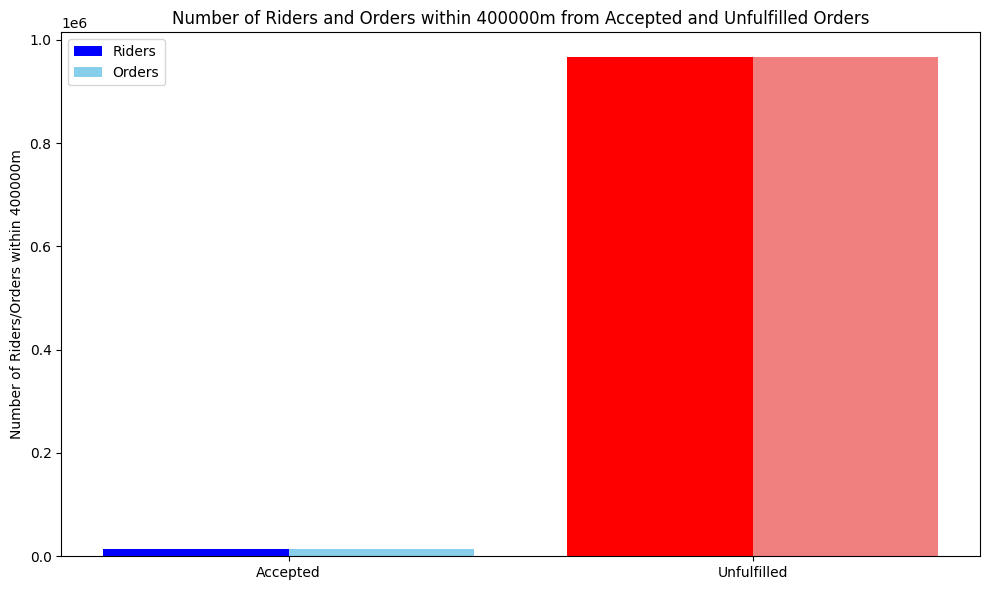

In [20]:
# Plot the results
plt.figure(figsize=(10, 6))

plt.bar([1, 2], [accepted_riders_within_circle, unfulfilled_riders_within_circle], color=['blue', 'red'], width=0.4, label='Riders')
plt.bar([1.4, 2.4], [accepted_orders_within_circle, unfulfilled_orders_within_circle], color=['skyblue', 'lightcoral'], width=0.4, label='Orders')

plt.xticks([1.2, 2.2], ['Accepted', 'Unfulfilled'])
plt.ylabel('Number of Riders/Orders within 400000m')
plt.title('Number of Riders and Orders within 400000m from Accepted and Unfulfilled Orders')
plt.legend()

plt.tight_layout()
plt.show()

<ipython-input-21-bbe31c0224d1>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(categories, rotation=45, ha='right')


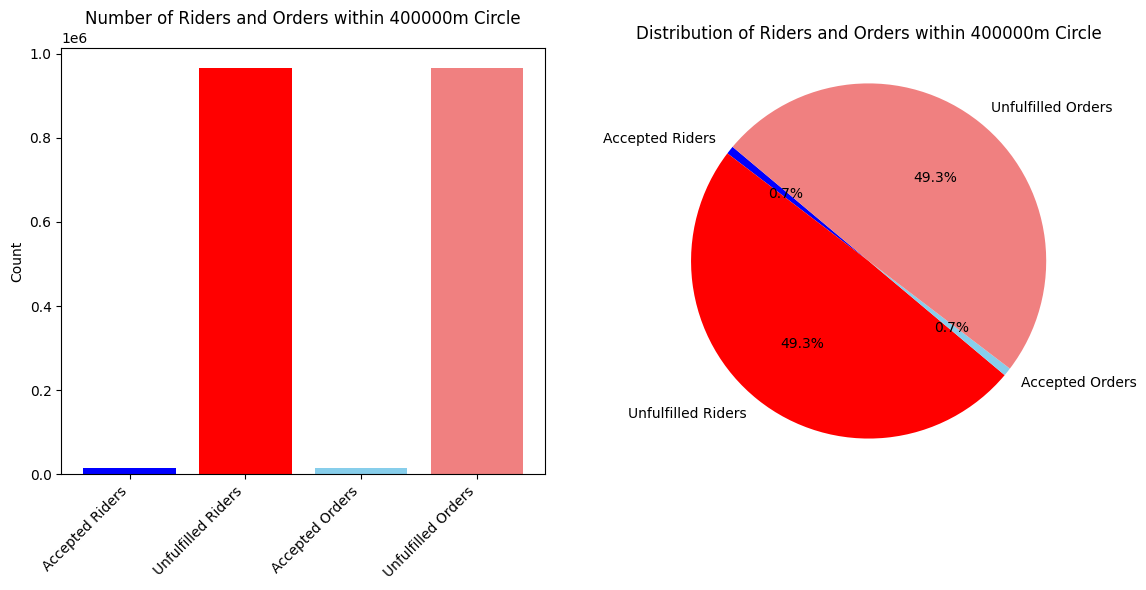

In [21]:
# Plotting the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
categories = ['Accepted Riders', 'Unfulfilled Riders', 'Accepted Orders', 'Unfulfilled Orders']
values = [accepted_riders_within_circle, unfulfilled_riders_within_circle, accepted_orders_within_circle, unfulfilled_orders_within_circle]

ax1.bar(categories, values, color=['blue', 'red', 'skyblue', 'lightcoral'])
ax1.set_ylabel('Count')
ax1.set_title(f'Number of Riders and Orders within {circle_radius}m Circle')
ax1.set_xticklabels(categories, rotation=45, ha='right')

# Pie chart
sizes = [accepted_riders_within_circle, unfulfilled_riders_within_circle, accepted_orders_within_circle, unfulfilled_orders_within_circle]
labels = ['Accepted Riders', 'Unfulfilled Riders', 'Accepted Orders', 'Unfulfilled Orders']
colors = ['blue', 'red', 'skyblue', 'lightcoral']

ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title(f'Distribution of Riders and Orders within {circle_radius}m Circle')

plt.tight_layout()
plt.show()

In [22]:
!pip install notebook datashader holoviews hvplot fastparquet python-snappy
!pip install panel hvplotnel hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.4 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement hvplotnel (from versions: none)
ERROR: No matching distribution found for hvplotnel


/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:61: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Function "cuInit" not found
  warnings.warn(str(e))


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
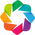

In [23]:
import datashader as ds, pandas as pd, colorcet
import datashader.transfer_functions as tf

import holoviews as hv, pandas as pd, colorcet as cc
from holoviews.element.tiles import EsriImagery
from holoviews.operation.datashader import datashade
hv.extension('bokeh')

# Datashader

In [ ]:
cvs = ds.Canvas(plot_width=800, plot_height=600)
# Aggregate the data
agg = cvs.points(df, "texture_mean", "perimeter_mean")
# Transfer function
img = tf.shade(agg)
# Display the image
img

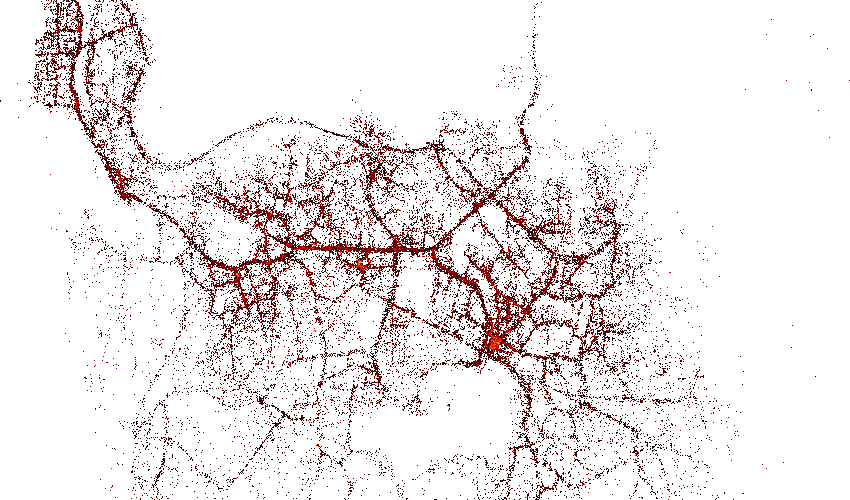

In [25]:
cvs = ds.Canvas(plot_width=850, plot_height=500)
agg = cvs.points(df, 'lat', 'lng')
img = ds.tf.shade(agg, cmap=colorcet.fire, how='log')
img

#Panel-Hvplot
Panel is a powerful Python library for creating interactive and web-based data visualizations. It allows you to build interactive dashboards, applications, and GUIs that can be deployed on the web.

HvPlot is a high-level data visualization library built on top of Holoviews, Bokeh, and other popular Python visualization libraries. It provides a concise and intuitive interface for creating interactive and exploratory data visualizations.

In [31]:
import hvplot.pandas
import panel as pn

In [32]:
import numpy as np
# Combine 'lat' and 'lng' into a 2D array
lat = df['lat']
lng = df['lng']
data = np.column_stack((lat, lng))
data = pd.DataFrame(data, columns=['x-axis', 'y-axis'])
data.head()

,x-axis,y-axis
0,6.549147,3.392184
1,6.570408,3.396597
2,6.566144,3.366483
3,6.576791,3.389592
4,6.577215,3.371172


In [33]:
scatter_plot = data.hvplot.scatter(x='x-axis', y='y-axis')


In [35]:
dashboard = pn.Column(
    'Panel Visualization Dashboard',
    scatter_plot
    )
dashboard.servable(title='Panel Visualization Dashboard')

#Clifford Attractors
Clifford attractors exhibit complex, chaotic behavior and can produce intricate, visually-striking fractal patterns when plotted. Some key properties of Clifford attractors include:

Sensitivity to initial conditions: Small changes in the initial values of x and y can lead to drastically different trajectories over time, a hallmark of chaotic systems. Self-similarity: The fractal patterns generated by Clifford attractors display self-similarity, meaning that smaller sections of the attractor resemble the larger whole. Unusual shapes: The shapes produced by Clifford attractors can be quite complex and irregular, often featuring spirals, loops, and other intricate structures.

In [36]:
def clifford_trajectory(a,b,c,d,x0,y0,n):
  xs, ys = np.zeros(n), np.zeros(n)
  xs[0], ys[0] = x0, y0
  for i in np.arange(n-1):
    xs[i+1] = np.sin(a * ys[i]) + c * np.cos(a * xs[i])
    ys[i+1] = np.sin(b * xs[i]) + d * np.cos(b * ys[i])
  return xs, ys

In [40]:
import datashader as ds
from datashader import transfer_functions as tf

from colorcet import palette_n
ps = {k:p[::-1] for k, p in palette_n.items()}

import panel as pn
pn.extension()

def clifford_plot(a=1.9, b=1.9, c=1.9, d=0.8, n=10000000, colormap=ps['kbc']):
    cvs = ds.Canvas(plot_width=600, plot_height=600)
    xs, ys = clifford_trajectory(a, b, c, d, 0, 0, n)
    agg = cvs.points(pd.Dataframe({'x':xs, 'y':ys}), 'lat', 'lng')
    return tf.shade(agg, cmap=colormap)

In [41]:
clifford_plot(a=1.7, b=1.7, c=0.6, d=1.2, n=20000000, colormap=ps['dimgray'])

AttributeError: module 'pandas' has no attribute 'Dataframe'